# Evaluate Ablation Studies


In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from os.path import join

sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")
xticks = [1, *range(10, 100, 10), 100]

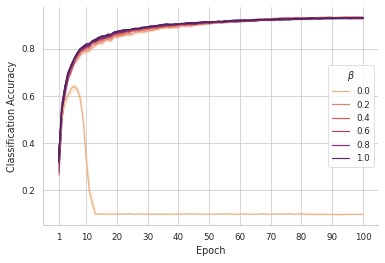

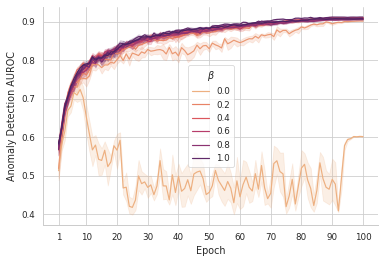

In [2]:


root = "/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/ablation/"
# root = "/home/ki/projects/work/mchad/logs/multiruns/ablation/12/04/21-14:49:51/"

from matplotlib.ticker import FuncFormatter

dfs = []

for i in range(0, 12):
    # /home/ki/projects/work/mchad/logs/multiruns/ablation/01/20/22-09:18:24
    path = f"{root}/vary_ce/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["model"]["weight_ce"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["epoch", "step", "Distance/OSR/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\beta$"] = ce
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$\\beta$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.legend(loc="center right", title="$\\beta$")
plt.savefig("out/acc-beta.pgf", dpi=300)
plt.show()


g = sb.lineplot(
    data=df, x="epoch", y="Distance/OSR/AUROC/val", hue="$\\beta$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/auroc-beta.pgf", dpi=300)
plt.show()

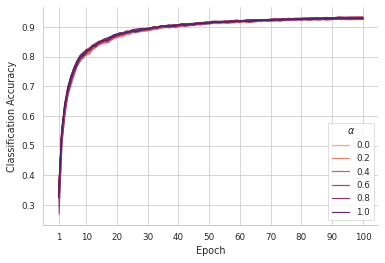

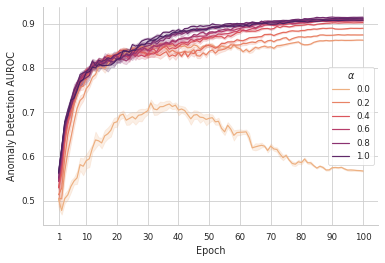

In [7]:
dfs = []

for i in range(0, 12):
    path = f"{root}/vary_center/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["model"]["weight_center"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["step", "epoch", "Distance/OSR/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\alpha$"] = ce
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$\\alpha$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/acc-alpha.pgf", dpi=300)
plt.show()

g = sb.lineplot(
    data=df, x="epoch", y="Distance/OSR/AUROC/val", hue="$\\alpha$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/auroc-alpha.pgf", dpi=300)
plt.show()

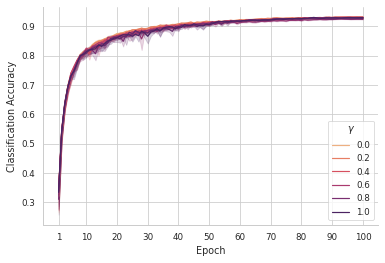

In [4]:
dfs = []

for i in range(0, 11):
    path = f"/run/media/ki/292b6fa6-3ffb-4b84-9ed3-6bf879e10535/kirchhei/newmchad/ablation/vary_oe/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["model"]["weight_oe"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["step", "epoch", "Distance/OSR/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\gamma$"] = ce
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$\gamma$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/acc-gamma.pgf", dpi=300)
plt.show()

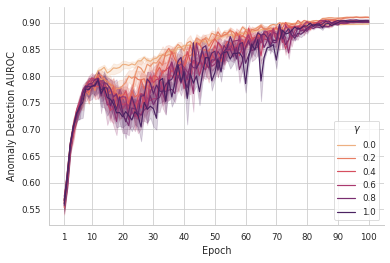

In [5]:
g = sb.lineplot(
    data=df, x="epoch", y="Distance/OSR/AUROC/val", hue="$\gamma$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
g.set(xticks=xticks)
sb.despine()
plt.savefig("out/auroc-gamma.pgf", dpi=300)
plt.show()

In [6]:
df

,index,step,epoch,Distance/OSR/AUROC/val,Accuracy/val,$\gamma$
0,0,38,1.0,0.575524,0.185352,0.0
1,3,77,1.0,0.576628,0.250781,0.0
2,6,116,1.0,0.563335,0.267578,0.0
3,9,155,1.0,0.602759,0.200391,0.0
4,10,194,1.0,0.547779,0.275586,0.0
...,...,...,...,...,...,...
10995,2654,39041,100.0,0.903085,0.929688,1.0
10996,2657,39080,100.0,0.902755,0.929688,1.0
10997,2660,39119,100.0,0.902600,0.929297,1.0
10998,2663,39158,100.0,0.902646,0.930078,1.0
